# Predicción de la rotación de clientes en un Banco utilizando datos históricos

<h1>Tabla de contenido<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introducción" data-toc-modified-id="Introducción-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introducción</a></span></li><li><span><a href="#Carga-de-librerias" data-toc-modified-id="Carga-de-librerias-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Carga de librerias</a></span></li><li><span><a href="#Carga-de-datos" data-toc-modified-id="Carga-de-datos-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Carga de datos</a></span></li><li><span><a href="#Analisis-de-los-datos" data-toc-modified-id="Analisis-de-los-datos-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Analisis de los datos</a></span><ul class="toc-item"><li><span><a href="#Eliminar-datos" data-toc-modified-id="Eliminar-datos-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Eliminar datos</a></span></li></ul></li><li><span><a href="#Reemplazar-valores-ausentes" data-toc-modified-id="Reemplazar-valores-ausentes-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Reemplazar valores ausentes</a></span></li><li><span><a href="#Características-categóricas-en-numéricas" data-toc-modified-id="Características-categóricas-en-numéricas-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Características categóricas en numéricas</a></span></li><li><span><a href="#Segmentación-de-los-datos" data-toc-modified-id="Segmentación-de-los-datos-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Segmentación de los datos</a></span></li><li><span><a href="#Primer-prueba-de-modelo" data-toc-modified-id="Primer-prueba-de-modelo-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Primer prueba de modelo</a></span></li><li><span><a href="#Modelos-con-sobremuestreo" data-toc-modified-id="Modelos-con-sobremuestreo-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>Modelos con sobremuestreo</a></span><ul class="toc-item"><li><span><a href="#Sobremuestreo" data-toc-modified-id="Sobremuestreo-9.1"><span class="toc-item-num">9.1&nbsp;&nbsp;</span>Sobremuestreo</a></span></li><li><span><a href="#Modelo-de-árbol" data-toc-modified-id="Modelo-de-árbol-9.2"><span class="toc-item-num">9.2&nbsp;&nbsp;</span>Modelo de árbol</a></span></li><li><span><a href="#Modelo-de-bosque-aleatorio" data-toc-modified-id="Modelo-de-bosque-aleatorio-9.3"><span class="toc-item-num">9.3&nbsp;&nbsp;</span>Modelo de bosque aleatorio</a></span></li><li><span><a href="#Modelo-de--regresion-logistica" data-toc-modified-id="Modelo-de--regresion-logistica-9.4"><span class="toc-item-num">9.4&nbsp;&nbsp;</span>Modelo de  regresion logistica</a></span></li></ul></li><li><span><a href="#Modelos-con-ajuste-de-las-clases" data-toc-modified-id="Modelos-con-ajuste-de-las-clases-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>Modelos con ajuste de las clases</a></span><ul class="toc-item"><li><span><a href="#Modelo-de-arbol" data-toc-modified-id="Modelo-de-arbol-10.1"><span class="toc-item-num">10.1&nbsp;&nbsp;</span>Modelo de arbol</a></span></li><li><span><a href="#Modelo-de-bosque" data-toc-modified-id="Modelo-de-bosque-10.2"><span class="toc-item-num">10.2&nbsp;&nbsp;</span>Modelo de bosque</a></span></li><li><span><a href="#Modelo-de-regresion-logistica" data-toc-modified-id="Modelo-de-regresion-logistica-10.3"><span class="toc-item-num">10.3&nbsp;&nbsp;</span>Modelo de regresion logistica</a></span></li></ul></li><li><span><a href="#Comprobación-del-modelo-en-el-conjunto-de-prueba" data-toc-modified-id="Comprobación-del-modelo-en-el-conjunto-de-prueba-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Comprobación del modelo en el conjunto de prueba</a></span></li><li><span><a href="#Valor-AUC-ROC" data-toc-modified-id="Valor-AUC-ROC-12"><span class="toc-item-num">12&nbsp;&nbsp;</span>Valor AUC-ROC</a></span></li></ul></div>

## Introducción

Los clientes del banco se están yendo, cada mes, poco a poco. Los banqueros descubrieron que es más barato salvar a los clientes existentes que atraer nuevos.
Se necesita predecir si un cliente dejará el banco pronto mediante los datos sobre el comportamiento pasado de los clientes y la terminación de contratos con el banco.  
Los datos se almacenan en el archivo `/datasets/Churn.csv`

**Objetivos**

- Crear un modelo con el máximo valor F1 posible de al menos 0.59
- Verificar F1 para el conjunto de prueba
- Medir la métrica AUC-ROC y compararla con el valor F1

## Carga de librerias

In [2]:
# se importan las librerias
import pandas as pd
import numpy as np
import seaborn as sns
from scipy.stats import pointbiserialr, chi2_contingency
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_intercativity = "all"
from sklearn.model_selection import train_test_split 
from sklearn.metrics import (f1_score,
                             roc_auc_score,
                            roc_curve)
from sklearn.metrics import (
    roc_curve,
    precision_score,
    recall_score)
from sklearn.utils import shuffle
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier 
import matplotlib.pyplot as plt

## Carga de datos 

Se cargan los el archivo csv  en la variable `data`

In [3]:
# se almacenan los datos en la variable 'data'
data = pd.read_csv("D:\PROYECTOS\datasets\Churn.csv")

In [4]:
#  se observan las primeras 5 filas 
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [5]:
# se observa la informacion general del dataframe 'data'
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


De acuerdo con la documentación:
    
- **RowNumber**: índice de cadena de datos
- **CustomerId**: identificador de cliente único
- **Surname**: apellido
- **CreditScore**: valor de crédito
- **Geography**: país de residencia
- **Gender**: sexo
- **Age**: edad
- **Tenure**: período durante el cual ha madurado el depósito a plazo fijo de un cliente (años)
- **Balance**: saldo de la cuenta
- **NumOfProducts**: número de productos bancarios utilizados por el cliente
- **HasCrCard**: el cliente tiene una tarjeta de crédito (1 - sí; 0 - no)
- **IsActiveMember**: actividad del cliente (1 - sí; 0 - no)
- **EstimatedSalary**: salario estimado
- **Exited**: El cliente se ha ido (1 - sí; 0 - no)

El conjunto de datos contiene 10,000 observaciones y 14 características, cada una proporcionando información sobre el comportamiento de los clientes. El objetivo es predecir los valores de la columna "Exited". Se ha identificado la presencia de valores ausentes en la característica "Tenure", lo que requiere un análisis para determinar cómo tratar esos valores.

Antes de iniciar el análisis de los datos, es necesario realizar un tratamiento de los nombres de las columnas. Ajustar los nombres siguiendo convenciones, como separar las palabras con guiones bajos y utilizar minúsculas, tiene beneficios significativos. Mejora la legibilidad, garantiza consistencia y evita problemas de sintaxis. Este enfoque facilita el trabajo con los datos y promueve la adopción de buenas prácticas de codificación.

## Analisis de los datos 

Se incia ajustando los nombres de las columnas para una mejor manipulacion de los datos.

In [6]:
# Nombres de las columnas en minusculas
data.columns = data.columns.str.lower()
data.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

In [7]:
# Se separan las palabras con guiones bajos
data.rename(columns={'rownumber':'row_number', 'customerid':'customer_id', 'creditscore':'credit_score', 'numofproducts':'num_of_products', 'hascrcard':'cr_card',
                    'isactivemember':'active_member', 'estimatedsalary':'estimated_salary'}, inplace=True)
data.columns

Index(['row_number', 'customer_id', 'surname', 'credit_score', 'geography',
       'gender', 'age', 'tenure', 'balance', 'num_of_products', 'cr_card',
       'active_member', 'estimated_salary', 'exited'],
      dtype='object')

In [8]:
# Se buscan valores ausentes en el dataset 
print('Valores ausentes en el conjunto de datos:')
data.isnull().sum()

Valores ausentes en el conjunto de datos:


row_number            0
customer_id           0
surname               0
credit_score          0
geography             0
gender                0
age                   0
tenure              909
balance               0
num_of_products       0
cr_card               0
active_member         0
estimated_salary      0
exited                0
dtype: int64

In [9]:
# se buscan valores duplicados en el dataset
print('Valores duplicados en el conjunto de datos:', data.duplicated().sum())

Valores duplicados en el conjunto de datos: 0


In [10]:
# Se observan los valores únicos de la columna 'tenure' ordenados
unique_tenure = data['tenure'].sort_values().unique()

# Imprimir los valores únicos de 'tenure'
print('Valores unicos del tiempo de permanencia en años:', unique_tenure)

Valores unicos del tiempo de permanencia en años: [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. nan]


In [11]:
# Se obtiene el porcentaje de valores ausentes en el conjunto de datos completo
print('Porcentaje de valores ausentes en la columna "tenure":', 100 / len(data) * len(data[data['tenure'].isnull()]))

Porcentaje de valores ausentes en la columna "tenure": 9.09


La columna 'tenure' muestra valores ausentes que corresponden al período en el cual ha madurado el depósito a plazo fijo de los clientes en años. Esta falta de datos puede atribuirse a errores en la extracción de los datos o a la falta de información sobre los años de permanencia de ciertos clientes, incluyendo aquellos que no tienen ningún año de permanencia en depósitos a plazo fijo. 
 Los valores faltantes en 'tenure' representan el 9.01% de los datos.

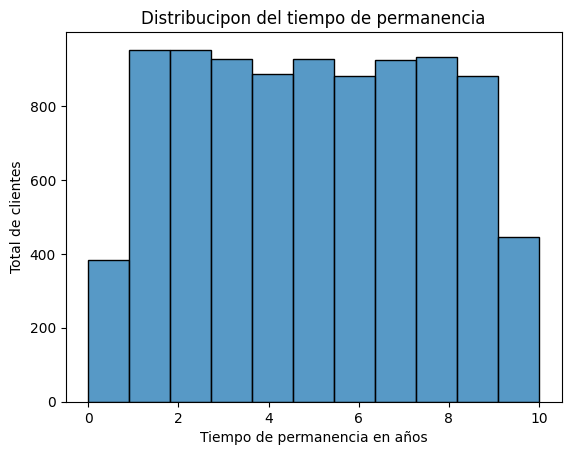

count    9091.000000
mean        4.997690
std         2.894723
min         0.000000
25%         2.000000
50%         5.000000
75%         7.000000
max        10.000000
Name: tenure, dtype: float64


In [12]:
# Eliminar los valores NaN del período (Tenure)
tenure_values = data['tenure'].dropna()

# Grafico del tiempo de permanencia 
sns.histplot(data=tenure_values, bins=11, kde=False)
plt.xlabel('Tiempo de permanencia en años')
plt.ylabel('Total de clientes')
plt.title('Distribucipon del tiempo de permanencia')
plt.show()

print(tenure_values.describe())


La mayoría de los clientes, representados por más de 800 personas, tienen un período de permanencia de 1 a 9 años. Esto indica que existe un grupo significativo de clientes que eligen mantener sus depósitos a plazo fijo por períodos relativamente cortos.

En comparación, hay menos clientes con un período de permanencia de 10 años o más. Esto sugiere que la proporción de clientes que deciden mantener sus depósitos a plazo fijo por períodos más largos es menor. Además, se identificó un grupo de clientes que no tienen ningún período de permanencia registrado. Esto podría deberse a diferentes razones, como clientes nuevos que aún no han tenido la oportunidad de establecer un período de permanencia o falta de información en los registros.

En general, estos datos revelan una distribución asimétrica en cuanto a los períodos de permanencia de los clientes en depósitos a plazo fijo, con la mayoría optando por períodos más cortos.

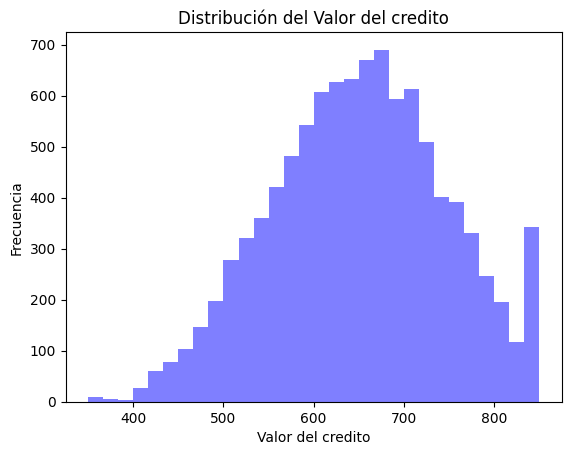

Valores estadisticos
------------------------------
count    10000.000000
mean       650.528800
std         96.653299
min        350.000000
25%        584.000000
50%        652.000000
75%        718.000000
max        850.000000
Name: credit_score, dtype: float64


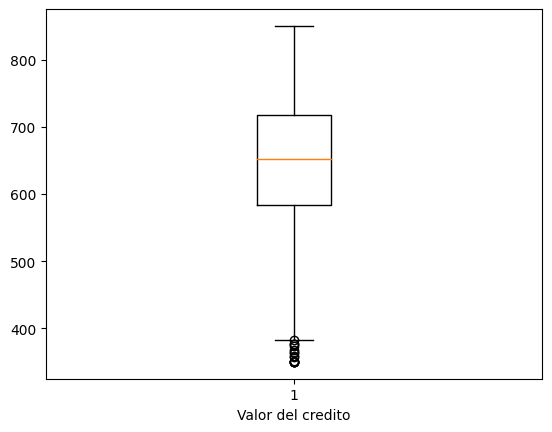

In [13]:
# Crear histograma de la columna 'CreditScore'
plt.hist(data['credit_score'], bins=30, color='blue', alpha=0.5)

# Configurar etiquetas y título del gráfico
plt.xlabel('Valor del credito')
plt.ylabel('Frecuencia')
plt.title('Distribución del Valor del credito')

# Mostrar el gráfico
plt.show()

# valores estadisticos de 'creditscore' 
print('Valores estadisticos' )
print('-'*30)
print(data['credit_score'].describe())

# Crear box plot de la columna 'CreditScore'
plt.boxplot(data['credit_score'])

# Configurar etiqueta del eje x
plt.xlabel('Valor del credito')

# Mostrar el gráfico
plt.show()

El puntaje promedio de crédito de estos clientes es de aproximadamente 650.53. La dispersión de los datos se refleja en una desviación estándar de aproximadamente 96.65. Esto indica que los puntajes de crédito de los clientes varían ampliamente en relación a la media.

El puntaje mínimo de crédito observado en la muestra es de 350, lo que sugiere que algunos clientes presentan un puntaje de crédito relativamente bajo.el 50% tiene un puntaje de crédito igual o inferior a 652.En general los valores de crédito de los clientes analizados muestran una distribución amplia con puntajes de crédito tanto bajos como altos.

Se analizara los rangos de edades de clientes con altos nivel de credico para saber si tienen alguna relacion con la edad de los clientes. Para investigar la relacion, se procederá a analizar los rangos de edades de aquellos clientes con niveles de crédito elevados, que se basará en un umbral específico de 500 a 700. 

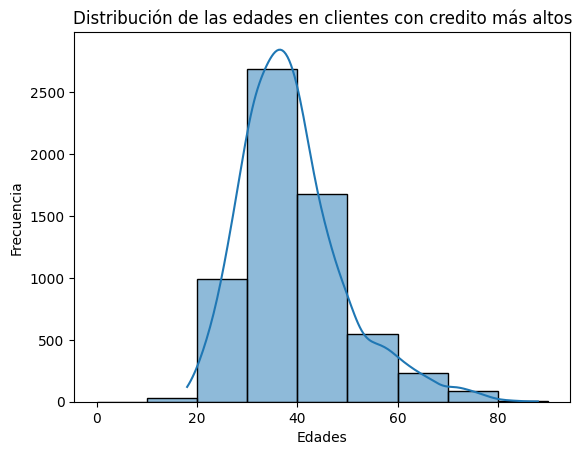

In [14]:
# se seleccionan clientes con alto valos de credito
clients_high_cr = data[data['credit_score'].between(500, 700)]

# Configurar los incrementos de las edades en el eje x
age_bins = range(0, max(clients_high_cr['age']) + 10, 10)

# Gráfico de la distribución de las edades
sns.histplot(data=clients_high_cr, x='age', bins=age_bins, kde=True)
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de las edades en clientes con credito más altos')
plt.show()

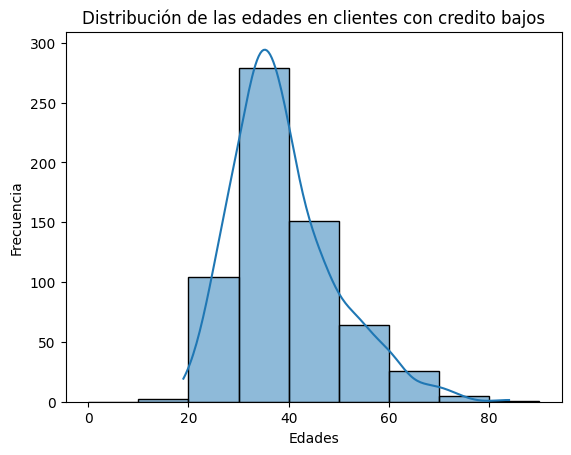

In [15]:
# se seleccionan clientes con alto valos de credito
clients_low_cr = data[data['credit_score'].between(0, 499)]

# Configurar los incrementos de las edades en el eje x
age_bins = range(0, max(clients_low_cr['age']) + 10, 10)

# Gráfico de la distribución de las edades
sns.histplot(data=clients_low_cr, x='age', bins=age_bins, kde=True)
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de las edades en clientes con credito bajos')
plt.show()

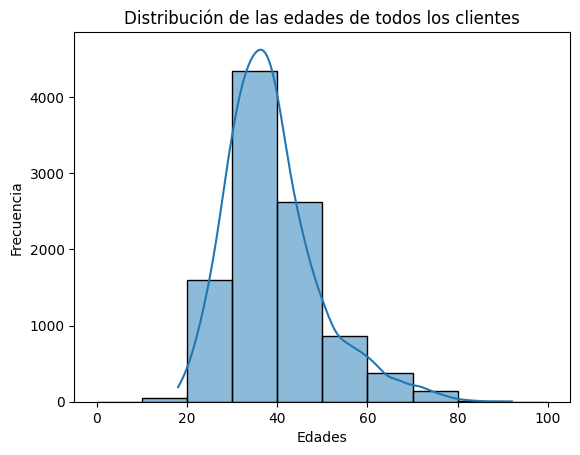

In [16]:
# Configurar los incrementos de las edades en el eje x
age_bins = range(0, max(data['age']) + 10, 10)

# Gráfico de la distribución de las edades
sns.histplot(data=data, x='age', bins=age_bins, kde=True)
plt.xlabel('Edades')
plt.ylabel('Frecuencia')
plt.title('Distribución de las edades de todos los clientes')
plt.show()

Tras analizar la distribución de las edades de los clientes en relación a su nivel de crédito, se concluye que no se observan cambios significativos en dicha distribución. Tanto para los clientes con niveles de crédito elevados como para aquellos con niveles más bajos, la mayoría de las edades se encuentran en un rango amplio de 20 a 80 años, que representa la distribución de edades del conjunto de datos completo.

En general, se observa que la mayor concentración de clientes se encuentra en el rango de edades comprendido entre los 20 y los 50 años, lo que indica una predominancia de clientes relativamente jóvenes. Sin embargo, no se identifica una correlación directa entre la edad de los clientes y su nivel de crédito, ya que ambos grupos se encuentran en rangos de edades similares.
Estos resultados sugieren que la edad no es un factor determinante para el nivel de crédito que los clientes pueden recibir, al menos en el contexto de este conjunto de datos

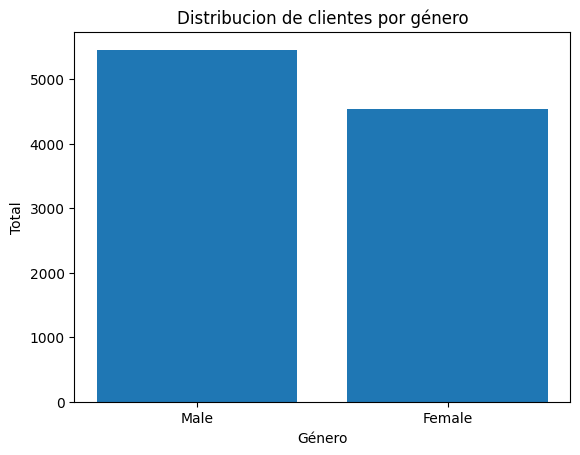

In [17]:
# Distribucion de clientes por genero
genre_counts = data['gender'].value_counts()

# Se crea  gráfico de barras
plt.bar(genre_counts.index, genre_counts.values)
plt.xlabel('Género')
plt.ylabel('Total')
plt.title('Distribucion de clientes por género')
plt.show()

Se observa que el número de clientes femeninos supera en más de un 10% al número de clientes masculinos. De los 10,000 clientes totales, aproximadamente 4,500 son hombres, mientras que alrededor de 5,500 son mujeres.

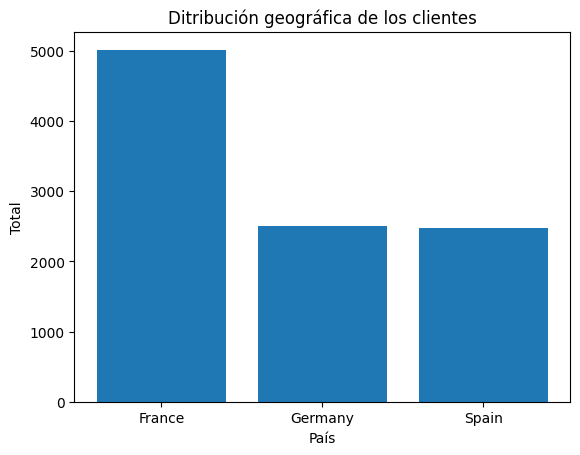

In [18]:
# Distribucion geografica del total de clientes
geography_counts = data['geography'].value_counts()

# Se cre4a  gráfico de barras
plt.bar(geography_counts.index, geography_counts.values)
plt.xlabel('País')
plt.ylabel('Total')
plt.title('Ditribución geográfica de los clientes')
plt.show()

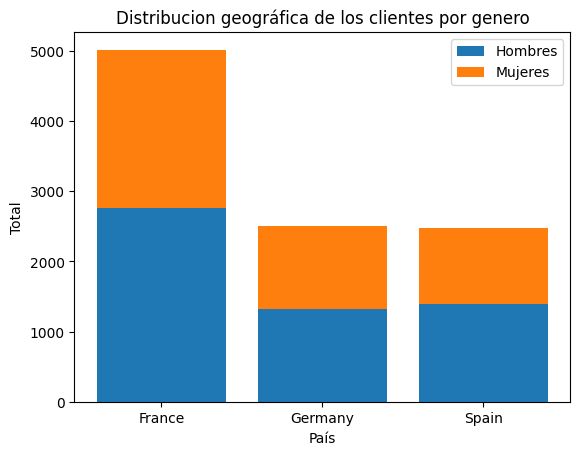

In [19]:
# Distribucion geografica de los clientes por genero

# Se agrupan los datos por geografía y género
grouped_data = data.groupby(['geography', 'gender']).size().unstack()

# Nombres de las ubicaciones geográficas
geography_labels = grouped_data.index

# Cantidad de clientes hombres y mujeres en cada ubicación geográfica
male_counts = grouped_data['Male']
female_counts = grouped_data['Female']

# Crear gráfico de barras apiladas
plt.bar(geography_labels, male_counts, label='Hombres')
plt.bar(geography_labels, female_counts, bottom=male_counts, label='Mujeres')
plt.xlabel('País')
plt.ylabel('Total')
plt.title('Distribucion geográfica de los clientes por genero')
plt.legend()
plt.show()

La distribución de los clientes se encuentra dividida en relación entre 3 países: La miatd de los clientes pertenece a Alemania y España. Cada uno de estos países cuenta con alrededor de 2,800 clientes en cada caso. Por otro lado, la otra mitad de los clientes está compuesta principalmente por clientes de Francia, con aproximadamente 4,800 clientes.

En cuanto a la distribución de género, se observa una proporción equitativa entre hombres y mujeres en el conjunto de datos analizado. Esta distribución igualitaria sugiere que tanto los hombres como las mujeres están representados en números similares dentro de la muestra de clientes. La distribución equilibrada de género demuestra que no hay una predominancia abrumadora de un género sobre el otro en el conjunto de datos.

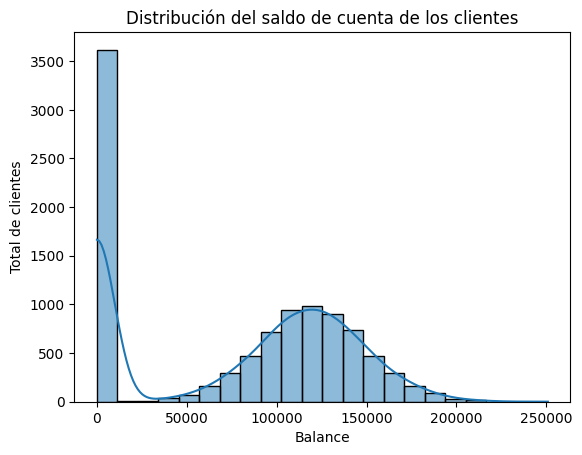

Datos estadísticos de la distribución del saldo en cuenta de clientes:
count     10000.000000
mean      76485.889288
std       62397.405202
min           0.000000
25%           0.000000
30%           0.000000
45%       87621.897000
50%       97198.540000
75%      127644.240000
90%      149244.792000
95%      162711.669000
max      250898.090000
Name: balance, dtype: float64


In [20]:
# Grafico del balance de los clientes
sns.histplot(data=data, x='balance', kde=True)
plt.xlabel('Balance')
plt.ylabel('Total de clientes')
plt.title('Distribución del saldo de cuenta de los clientes')
plt.show()

# Datos estadísticos de la columna 'balance'
print('Datos estadísticos de la distribución del saldo en cuenta de clientes:')
print(data['balance'].describe(percentiles=[.25,.30,0.45,.50,.75,.90,.95]))

Menos del 40% de los clientes no cuenta con saldo en cuentas, la mayoría de los clientes tienen saldos en el rango de $50,000 a $200,000, solo el 5% de los clientes tiene un saldo en cuenta superior a $162,711.67, lo que muestra que hay una minoría de clientes con saldos significativamente más altos.
El promedio del saldo en cuenta de los clientes es de aproximadamente $76,485.89, lo que indica que, en promedio, los clientes tienen un saldo positivo. La desviación estándar es de $62,397.41, lo que sugiere una amplia variabilidad en los saldos de cuenta de los clientes.

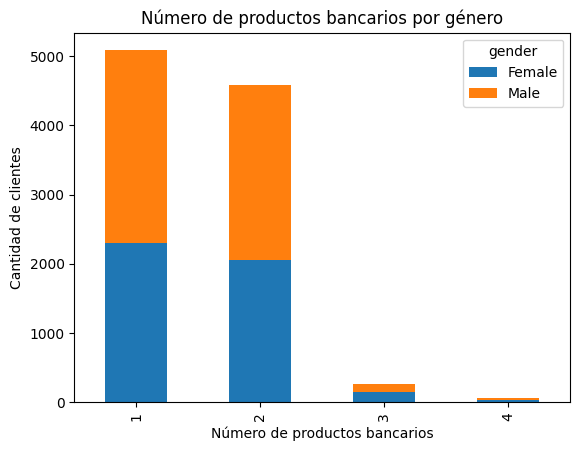

In [21]:
# grafico del numero de productos bancarios por genero
product_count = pd.pivot_table(data, values='row_number', index='num_of_products', columns= 'gender', aggfunc='count')
# Crear gráfico de barras apiladas
product_count.plot(kind='bar', stacked=True)
plt.xlabel('Número de productos bancarios')
plt.ylabel('Cantidad de clientes')
plt.title('Número de productos bancarios por género')
plt.show()

Después de analizar los datos, se observa que la mayoría de los clientes (más de 4000 clientes) tienen entre 1 y 2 productos bancarios. Sin embargo, hay menos de 1000 clientes que poseen más de 2 productos bancarios. Es interesante notar que esta distribución se mantiene proporcional en ambos géneros.

Estos resultados sugieren que la mayoría de los clientes mantienen una relación relativamente sencilla con el banco, optando por un número limitado de productos. Por otro lado, un grupo más reducido de clientes muestra una mayor diversificación en su cartera de productos bancarios.

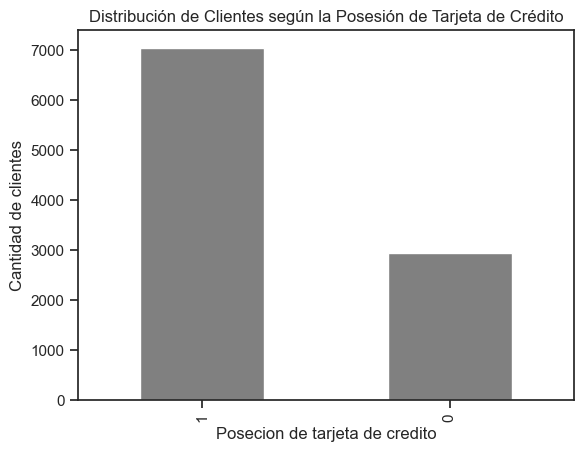

In [32]:
# se observa la cantidad de valores unicos de la columna 'cr_card'
data['cr_card'].value_counts().plot(kind='bar', color='gray')
plt.xlabel('Posecion de tarjeta de credito')
plt.ylabel('Cantidad de clientes')
plt.title('Distribución de Clientes según la Posesión de Tarjeta de Crédito')
plt.show()

([<matplotlib.axis.XTick at 0x24f6df3ef90>,
 [Text(0, 0, 'No'), Text(1, 0, 'Sí')])

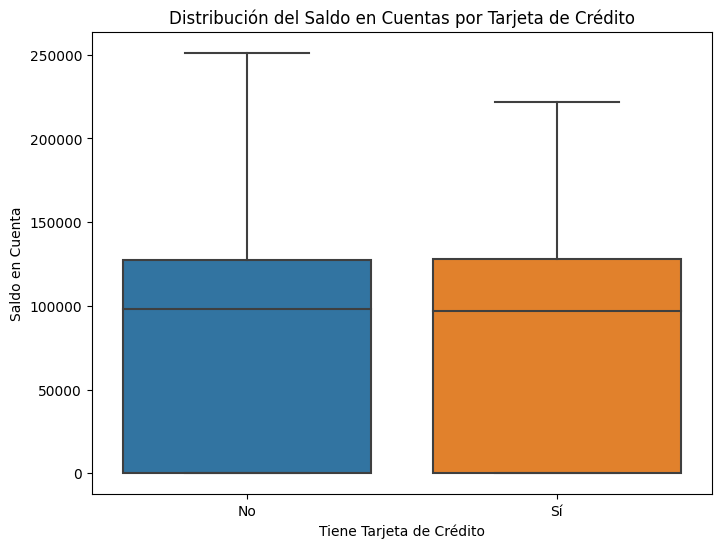

In [23]:
# Filtrar los datos para obtener clientes con y sin tarjetas de crédito
with_credit_card = data[data['cr_card'] == 1]
without_credit_card = data[data['cr_card'] == 0]

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))
sns.boxplot(x='cr_card', y='balance', data=data)

# Configurar etiquetas y título del gráfico
plt.xlabel('Tiene Tarjeta de Crédito')
plt.ylabel('Saldo en Cuenta')
plt.title('Distribución del Saldo en Cuentas por Tarjeta de Crédito')

# Configurar los nombres de las etiquetas del eje x
plt.xticks([0, 1], ['No', 'Sí'])


De los 10,000 clientes, se observa que aproximadamente el 30% de ellos no cuentan con tarjeta de crédito. Al comparar la distribución del saldo en cuenta entre estos dos grupos de clientes, se nota que tanto la media como la mediana son similares.

Sin embargo, al analizar los gráficos, se puede notar una diferencia interesante: los clientes que no tienen tarjeta de crédito muestran un valor máximo de saldo en cuenta mayor en comparación con los clientes que sí tienen tarjeta de crédito.

Este hallazgo puede indicar que, aunque los clientes sin tarjeta de crédito tienen menos productos financieros, algunos de ellos han acumulado un saldo significativo en su cuenta bancaria. Esto podría deberse a diversas razones, como preferir el uso de efectivo o utilizar otros medios de pago en lugar de una tarjeta de crédito.

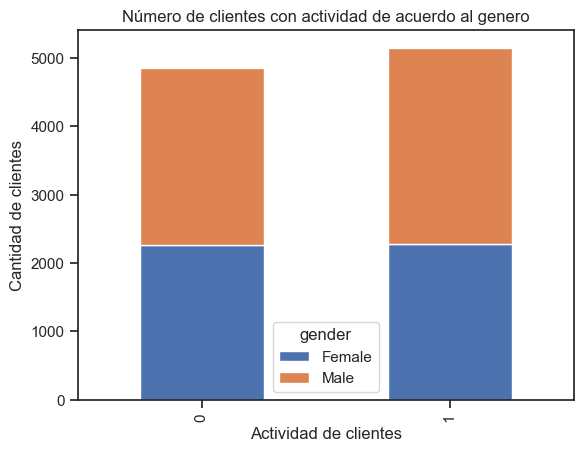

In [33]:
# grafico del numero de productos bancarios por genero
actived_count = pd.pivot_table(data, values='row_number', index='active_member', columns= 'gender', aggfunc='count')
# Crear gráfico de barras apiladas
actived_count.plot(kind='bar', stacked=True)
plt.xlabel('Actividad de clientes')
plt.ylabel('Cantidad de clientes')
plt.title('Número de clientes con actividad de acuerdo al genero')
plt.show()

Se observa una distribución similar entre los clientes que tienen actividad y aquellos que no la tienen. Sin embargo, es importante destacar que la mayoría de los clientes con actividad pertenecen al género femenino.

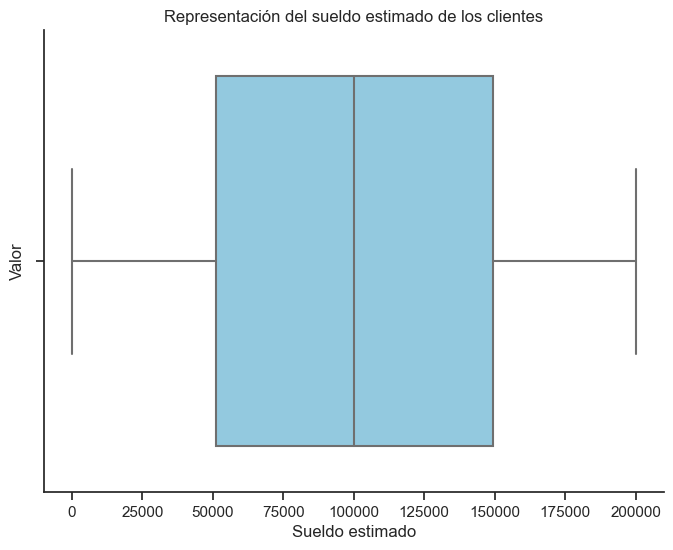

Datos estadisticos


count     10000.000000
mean     100090.239881
std       57510.492818
min          11.580000
25%       51002.110000
50%      100193.915000
75%      149388.247500
max      199992.480000
Name: estimated_salary, dtype: float64

In [38]:
# Grafico sobre el sueldo estimado de los clientes
sns.set(style="ticks")
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='estimated_salary', color='skyblue')
plt.xlabel('Sueldo estimado')
plt.ylabel('Valor')
plt.title('Representación del sueldo estimado de los clientes')
sns.despine()
plt.show()
print('Datos estadisticos')
data['estimated_salary'].describe()

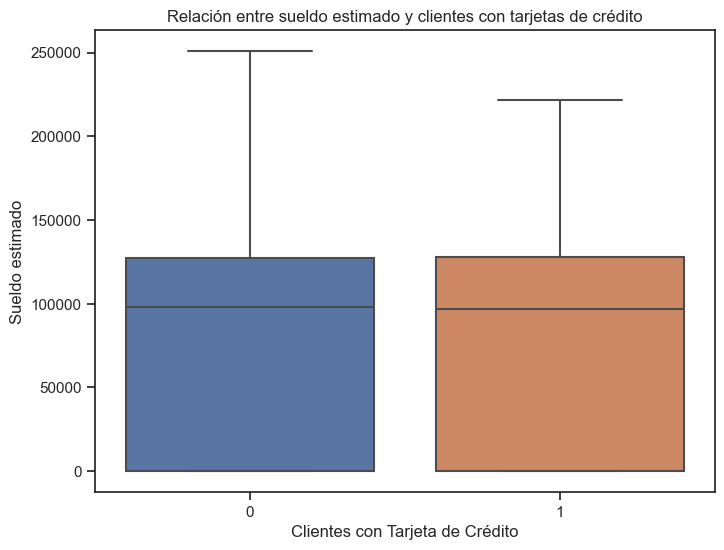

In [26]:
# Gráfico de dispersión del saldo en cuentas y tarjetas de crédito
plt.figure(figsize=(8, 6))
sns.boxplot(x="cr_card", y="balance", data=data)
plt.title('Relación entre sueldo estimado y clientes con tarjetas de crédito')
plt.xlabel("Clientes con Tarjeta de Crédito")
plt.ylabel("Sueldo estimado")
plt.show()

Se observa que el sueldo estimado promedio de los clientes es de aproximadamente 100,000. Sin embargo, la mayoría de los clientes se encuentra por debajo de los 150,000, mientras que un porcentaje menor tiene sueldos superiores a ese valor. El sueldo máximo registrado es de 199,992, y la desviación estándar de los sueldos es de 57,510, lo cual indica una gran dispersión de los datos.

Además, se puede notar una diferencia interesante entre los clientes que tienen y los que no tienen tarjeta de crédito en cuanto al sueldo estimado. Aquellos clientes que no cuentan con tarjeta de crédito tienden a tener un sueldo estimado más elevado en comparación con aquellos que sí tienen tarjeta de crédito. A pesar de esta diferencia, la media y la mediana de los sueldos tienen una distribución similar en ambos grupos.

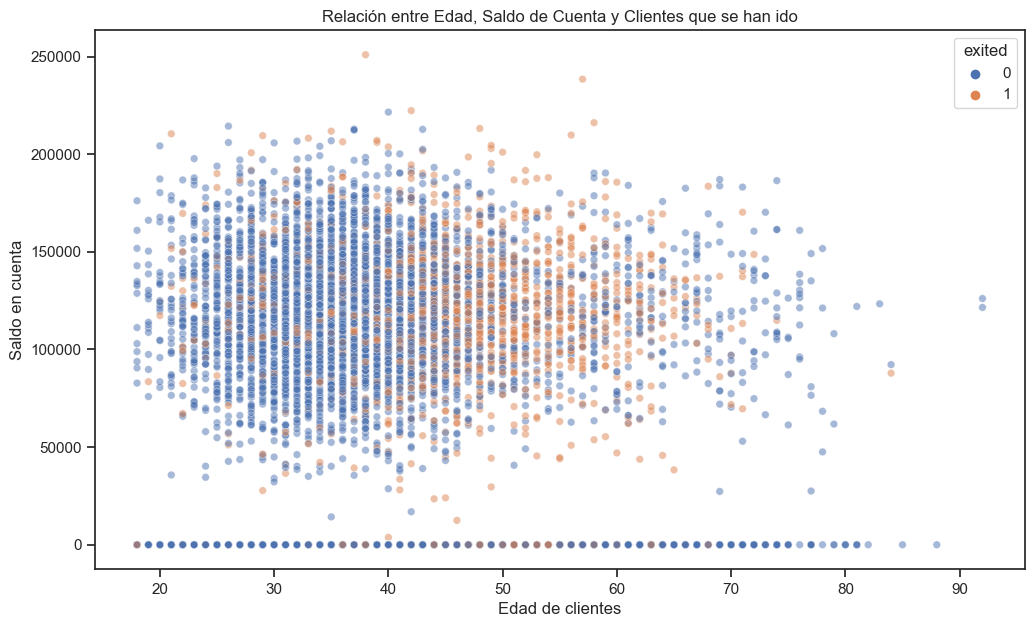

In [39]:
# Gráfico entre Edad, Saldo de Cuenta y Clientes que se han ido
plt.figure(figsize=(12,7))
sns.scatterplot(x="age", y="balance", hue="exited", s=30,alpha=0.5, data=data)
plt.title('Relación entre Edad, Saldo de Cuenta y Clientes que se han ido')
plt.xlabel("Edad de clientes")
plt.ylabel("Saldo en cuenta")
plt.show()



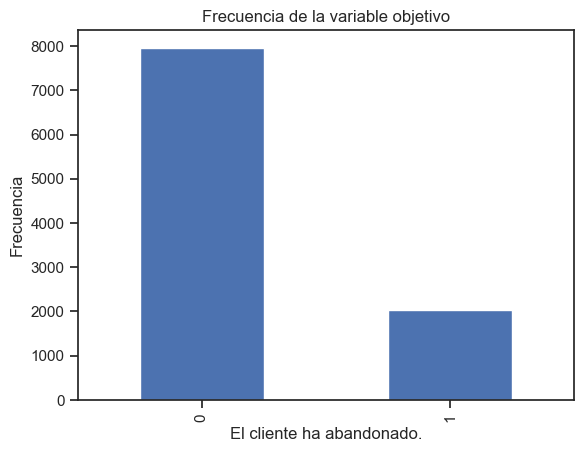

Datos numericos de la frecuencia de las clases de la variable objetivo


exited
0    7963
1    2037
Name: count, dtype: int64

In [28]:
# Frecuencia de las clases en la característica objetivo
class_frequency = data['exited'].value_counts()

# Se crea grafico
class_frequency.plot(kind='bar')
plt.xlabel('El cliente ha abandonado.')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de la variable objetivo')
plt.show()

print('Datos numericos de la frecuencia de las clases de la variable objetivo')
class_frequency

La mayoría de los clientes que han dejado el banco se encuentran en el rango de edad de 40 a 70 años, con un saldo en cuenta entre 50,000 y 200,000. Por otro lado, los clientes que continúan con el banco son en su mayoría más jóvenes, con edades entre 20 y 50 años, y también presentan un saldo en cuenta en el rango de 50,000 a 200,000.

Estos hallazgos sugieren que existe una diferencia significativa en términos de edad entre los clientes que han dejado el banco y aquellos que siguen siendo clientes. Los clientes más jóvenes tienen una mayor tendencia a permanecer con el banco, mientras que los clientes más adultos tienden a abandonarlo.

Es interesante notar que tanto los clientes que han dejado el banco como aquellos que siguen siendo clientes tienen un rango similar de saldo en cuenta, lo que implica que el saldo en cuenta no es el factor determinante para su decisión de abandonar o quedarse en el banco.

Nuestro conjunto de datos muestra un desbalance de clases en la columna objetivo. La mayoría de los clientes continúan en el banco, representando más de la mitad de los casos. Este desbalance tiene implicaciones en el análisis y modelado de datos, y es importante considerarlo al desarrollar estrategias y modelos predictivos. Es posible que se requieran técnicas de remuestreo y evaluación de métricas de rendimiento adecuadas para abordar este desafío y mejorar la precisión en la predicción de abandonos.

# Correlacion de variables cuantitativas

Para mejorar nuestro modelo, es crucial seleccionar las características que presentan una mayor correlación con nuestra columna objetivo. Para ello, realizaremos pruebas de correlación entre las variables y elegiremos aquellas que muestren una correlación más fuerte. Estas características seleccionadas serán utilizadas en nuestro modelo.

In [30]:
# Correlacion de variables cuantitativas
columns_ql = ['geography', 'gender', 'num_of_products', 'cr_card', 'active_member','tenure']

for column in columns_ql:
    crosstab = pd.crosstab(data['exited'], data[column])
    _, p, _, _, = chi2_contingency(crosstab)
    print(f"P valor entre las variables objetivo y {column}: {p}")

P valor entre las variables objetivo y geography: 3.830317605354266e-66
P valor entre las variables objetivo y gender: 2.2482100097131755e-26
P valor entre las variables objetivo y num_of_products: 0.0
P valor entre las variables objetivo y cr_card: 0.49237236141554697
P valor entre las variables objetivo y active_member: 8.785858269303705e-55
P valor entre las variables objetivo y tenure: 0.15362026589213953


In [41]:
columns_qt = ['balance', 'credit_score', 'age', 'estimated_salary']

for column in columns_qt:
    correlation, p_value = pointbiserialr(data['exited'], data[column])
    print(f"P-valor entre la variable objetivo y {column}: {p_value}")

P-valor entre la variable objetivo y balance: 1.2755633191473016e-32
P-valor entre la variable objetivo y credit_score: 0.0067382138921916815
P-valor entre la variable objetivo y age: 1.2399313093221127e-186
P-valor entre la variable objetivo y estimated_salary: 0.22644042802222883


In [42]:
def correlation_test(data, target_column, quant_columns):
    for column in quant_columns:
        result = pointbiserialr(data[target_column], data[column])
        print(f"Resultado de la prueba de correlación entre la variable objetivo y {column}: {result}")

# Utilizando la función con tus datos y columnas especificadas
columns_qt = ['balance', 'credit_score', 'age', 'estimated_salary']
correlation_test(data, 'exited', columns_qt)

Resultado de la prueba de correlación entre la variable objetivo y balance: SignificanceResult(statistic=0.11853276877163732, pvalue=1.2755633191473016e-32)
Resultado de la prueba de correlación entre la variable objetivo y credit_score: SignificanceResult(statistic=-0.027093539754658173, pvalue=0.0067382138921916815)
Resultado de la prueba de correlación entre la variable objetivo y age: SignificanceResult(statistic=0.2853230378350734, pvalue=1.2399313093221127e-186)
Resultado de la prueba de correlación entre la variable objetivo y estimated_salary: SignificanceResult(statistic=0.012096861026844874, pvalue=0.22644042802222883)


Al realizar pruebas de correlación, se identificó que las variables que muestran una mayor correlación con la variable objetivo son: país, género, estado de actividad del cliente, saldo en cuenta, el numero  de productos bancarios y en menor medida la eadd, asi como el valor del credito.

### Conclusiones

Al analizar los datos, se observa que la mayoría de los clientes tienen períodos de permanencia de 1 a 9 años en el banco, con una proporción menor optando por períodos más largos. Además, se identificó un grupo de clientes sin ningún período de permanencia registrado.

En cuanto al puntaje de crédito, se encontró que existe una variabilidad amplia, con puntajes que van desde 350 hasta niveles más altos. No se observó una relación clara entre la edad de los clientes y su nivel de crédito.

En términos de género, se encontró una distribución equitativa entre hombres y mujeres  en la muestra de clientes. Además, se identificó una distribución desigual entre los países, con la mayoría de los clientes provenientes de Francia.

En relación al saldo en cuenta, la mayoría de los clientes tienen saldos en el rango de $50,000 a $200,000, y se observó una minoría con saldos más altos. Además, se encontró que la cantidad de productos bancarios de los clientes varía, siendo la mayoría de los clientes quienes tienen entre 1 y 2 productos.

En cuanto a la variable objetivo de abandono del banco, se observó un desbalance de clases, con la mayoría de los clientes continuando en el banco. Esto puede requerir técnicas especiales para abordar este desbalance al desarrollar modelos predictivos.

En conclusión, se identificaron variables clave que muestran una correlación significativa con la variable objetivo, lo cual indica su relevancia para predecir el abandono del banco. Estas variables incluyen el país, género, estado de actividad del cliente, saldo en cuenta, edad, y el número de productos bancarios. Al considerar estas variables, es posible desarrollar modelos más precisos y efectivos para predecir el abandono del banco y tomar decisiones estratégicas basadas en estos hallazgos.


**Siguientes pasos:**

De acuerdo al analisis la caracteristica `Tenure` no guarda correlacion cestadistica con la decision de los clientes entre abandonar o no el banco, ya que es una columna que  tiene valores ausentes en un porcentaje del 9% en el conjutno de datos, se decide eliminar esa caracteristica así como  `row_number, customer_id, surname, estimated_salary` debido a que no aportan información al momento de clasificar.

Las caracteristicas `Geography y Gender` al ser caracteristicas categroricas, seran transformadas en caracteristicas numericas, para poder realizar la prueba de los módelos, mediante la tecnica One-Hot Encoding (OHE).

Una vez se obtenga el dataset para trabajar, se segmentaran los datos en entrenamiento y prueba, para trabajar el desequilibrio de las clases.


### Eliminar datos

In [46]:
# se eliminan  las caracteristicas: RowNumber y Customerld y surname
data_clean = data.drop(['row_number', 'customer_id','surname', 'tenure', 'estimated_salary'], axis=1)
data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   credit_score     10000 non-null  int64  
 1   geography        10000 non-null  object 
 2   gender           10000 non-null  object 
 3   age              10000 non-null  int64  
 4   balance          10000 non-null  float64
 5   num_of_products  10000 non-null  int64  
 6   cr_card          10000 non-null  int64  
 7   active_member    10000 non-null  int64  
 8   exited           10000 non-null  int64  
dtypes: float64(1), int64(6), object(2)
memory usage: 703.3+ KB


## Características categóricas en numéricas

In [47]:
data_clean_ohe = pd.get_dummies(data_clean, columns=['geography','gender'], drop_first=True)
data_clean_ohe.head(2)

,credit_score,age,balance,num_of_products,cr_card,active_member,exited,geography_Germany,geography_Spain,gender_Male
0,619,42,0.00,1,1,1,1,False,False,False
1,608,41,83807.86,1,0,1,0,False,True,False


## Segmentación de los datos

Debdio a que solo se cuenta con un dataset, se procedera a dividirlo en tres conjuntos: de entrenamiento,de validacion y de prueba, en la relacion 3:1:1 en las variables `bank_train, bank_valid y bank_test` respectivamente.

In [48]:
# se segmenta el dataset en dos variables: el de entrenamiento y el resto
bank_train, bank_rest = train_test_split(data_clean_ohe, test_size=0.40, random_state=12345)

In [49]:
# se separa el dataset 'bank_rest' en dos variables: el de validación y el de prueba
bank_test, bank_valid = train_test_split(bank_rest, test_size=0.50, random_state=12345)

**Dataset de entrenamiento**

In [50]:
# se declaran variables para las características y para la característica objetivo  del dataset de entrenamiento
features_train = bank_train.drop(['exited'], axis=1)
target_train = bank_train['exited']
features_train.shape

(6000, 9)

**Dataset de validación**

In [51]:
# se declaran variables para las características y para la característica objetivo  del dataset de validacion
features_valid = bank_valid.drop(['exited'], axis=1)
target_valid = bank_valid['exited']
features_valid.shape

(2000, 9)

**Dataset de prueba**

In [52]:
# se declaran variables para las características y para la característica objetivo  del dataset  prueba
features_test = bank_test.drop(['exited'], axis=1)
target_test = bank_test['exited']
features_test.shape

(2000, 9)

##  Primer prueba de modelo

Se procede a entrenar el modelo sin tomar en cuenta el desequilibrio que existe. Se utilizara el modelo  de Bosque aleatorio.

In [53]:
# se entrena el modelode con el dataset de entrenamiento 
model = RandomForestClassifier(random_state=12345)
model.fit(features_train, target_train)

RandomForestClassifier(random_state=12345)

In [54]:
valid_preds = model.predict(features_valid)
valid_proba_preds = model.predict_proba(features_valid)[:,1]
valid_preds[:10]


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [55]:
print(f"""
ROC AUC score: {round(roc_auc_score(target_valid, valid_proba_preds), 4)}
F1 score: {round(f1_score(target_valid, valid_preds), 4)}

Recall score: {round(recall_score(target_valid, valid_preds), 4)}
Precision score: {round(precision_score(target_valid, valid_preds), 4)}
""")


ROC AUC score: 0.8419
F1 score: 0.5694

Recall score: 0.4752
Precision score: 0.7102



El modelo de Bosque aleatorio una vez entrenado en el conjunto de entrenamiento sin tener en cuenta el desequilibrio existente , nos da como resultado un AUC-ROC de 84 % lo que indica que el modelo puede tener valor predictivo si el umbral se establece correctamente un F1 de 0.56 , sin embargo obtuvo un recall de 0.47 y precision de 0.71 es decir la porción de respuestas positivas identificadas por el modelo fue mayor  a  la cantidad de respuestas negativas que encontró el modelo mientras buscaba respuestas positivas.

En general el modelo tiene un valor predictivo moderado, pero es necesario considerar el desequilibrio de clases y buscar formas de mejorar el recall para capturar más respuestas positivas.

## Modelos con sobremuestreo

### Sobremuestreo

A continuación se procede a trabajar el desequilibrio de las clases mediante la técnica de  **sobremuestreo** debido a que hay una mayor cantidad de etiquetas de '0' en comparacion con las etiquetas '1', y eso generara un sesgo al momento de realizar el modelo. 

Se realizara una funcion que devolvera las caracteristicas y el objetivo despues del *sobremuestreo* y se aplicara la funcion para los datos de entrenamiento.
Una vez lista la funcion se procedera a su aplicacion a los modelos.

In [56]:
# Funcion 'upsample'
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )

    return features_upsampled, target_upsampled


features_upsampled, target_upsampled = upsample(
    features_train, target_train, 4
)
print(features_upsampled.shape)
print(target_upsampled.shape)

(9588, 9)
(9588,)


Se crearan bucles para encontrar el mejor valor de los hiperperametros para cada tipo de modelo, en este caso, se trabajaran 3 modelos: **Modelo de árbol de decision, Modelo de Bosque aleatorio, y de Regresión logistica,** que nos permitan obtener el mejor valor  F1(media armónica entre la precisión y la exhaustividad).


### Modelo de árbol

In [57]:
best_F1_tree = 0
best_depth_tree = 0

for depth in range(1, 16): 
    model_tree = DecisionTreeClassifier(random_state = 12345, max_depth = depth) 
    model_tree.fit(features_upsampled,target_upsampled) 
    valid_preds_tree = model_tree.predict(features_valid)
    F1_tree = f1_score(valid_preds_tree, target_valid)
    if F1_tree > best_F1_tree:
        best_F1_tree = F1_tree 
        best_depth_tree = depth 

print("F1  del modelo arbol de decisión en el conjunto de validación (max_depth = {}): {}".format(best_depth_tree, best_F1_tree))
final_model_tree_upsample = DecisionTreeClassifier(random_state=12345, max_depth= best_depth_tree)
final_model_tree_upsample.fit(features_upsampled, target_upsampled)

F1  del modelo arbol de decisión en el conjunto de validación (max_depth = 5): 0.5849639546858909


DecisionTreeClassifier(max_depth=5, random_state=12345)

In [58]:
# AUC_ROC para el modelo de arbol de decisiones 
probabilities_valid_tree = final_model_tree_upsample.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,probabilities_valid_tree[:, 1])
print('AUC_ROC score del modelo de arbol de decicion:', auc_roc)

AUC_ROC score del modelo de arbol de decicion: 0.8363592481160176


El modelo de arbol de decision con sobremuestreo obtuvo un F1 score de 0.58 lo que nos dice que el tanto la porción de respuestas positivas identificadas por el modelo y la cantidad de respuestas negativas que  encontró el modelo mientras buscaba respuestas positivas son porporcionales y un AUC-ROC de 83.

###  Modelo de bosque aleatorio

In [59]:
best_F1_f = 0
best_depth_f = 0
best_est_f = 0

for est in range(10, 81, 10):
    for depth in range (1, 15):
        model_forest = RandomForestClassifier(random_state=12345, n_estimators= est,max_depth = depth)
        model_forest.fit(features_upsampled,target_upsampled)
        valid_preds_f = model_forest.predict(features_valid)
        F1_forest = f1_score(valid_preds_f, target_valid)
        if F1_forest > best_F1_f:
            best_F1_f = F1_forest
            best_est_f = est
            best_depth_f = depth 


print("F1 del modelo bosque aleatorio en el conjunto de validación:",best_F1_f, "n_estimators:", best_est_f, "best_depth:", best_depth_f)
final_model_forest_up = RandomForestClassifier(random_state=12345, n_estimators= best_est_f,max_depth = best_depth_f)
final_model_forest_up.fit(features_upsampled,target_upsampled)

probabilities_valid_f = final_model_forest_up.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,probabilities_valid_f[:, 1])
print('AUC_ROC score del modelo de bosque aleatorio:', auc_roc)

F1 del modelo bosque aleatorio en el conjunto de validación: 0.6339285714285714 n_estimators: 80 best_depth: 12
AUC_ROC score del modelo de bosque aleatorio: 0.8537224673235682


La mejora del modelo de Bosque Aleatorio mediante el uso de sobremuestreo ha dado lugar a una mejora en el F1 score, que ahora es de 0.63. Esto indica que el modelo tiene un mejor equilibrio entre la identificación de respuestas positivas y la cantidad de respuestas negativas encontradas mientras buscaba respuestas positivas.

Además, el AUC-ROC ha aumentado a 85, lo cual indica que el modelo tiene una mejor capacidad para distinguir entre las clases positivas y negativas. Un valor de AUC-ROC más alto sugiere que el modelo es más efectivo en la clasificación y tiene un mejor rendimiento general.

###  Modelo de  regresion logistica

In [60]:
model_regression = LogisticRegression(random_state=12345, solver='liblinear')
model_regression.fit(features_upsampled,target_upsampled)
predicted_valid_reg = model_regression.predict(features_valid)
f1_reg = f1_score(target_valid, predicted_valid_reg)
                  
print('F1 del modelo de regresion logistica:',f1_reg)

probabilities_valid_reg = model_regression.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,probabilities_valid_reg[:, 1])
print('AUC_ROC score del modelo de regresion logística:', auc_roc)

F1 del modelo de regresion logistica: 0.4224683544303797
AUC_ROC score del modelo de regresion logística: 0.6775605595206508


La mejora del modelo de Regresión Logística mediante el uso de sobremuestreo resultó en un F1 score de 0.42. Esto indica que el modelo no logró equilibrar de manera adecuada la identificación de respuestas positivas y la cantidad de respuestas negativas encontradas mientras buscaba respuestas positivas.

Además, el AUC-ROC obtenido fue de 0.67, lo cual indica que el modelo tiene una capacidad moderada para distinguir entre las clases positivas y negativas.


## Modelos con ajuste de las clases

En cada modelo (arbol de decisiones, bosque aleatorio,regresion logistica) se **ajustara el peso de las clases** mediante el parametro `class_weight='balanced'`, ya que es un parametro apto para cadea uno de ellos.

### Modelo de arbol

In [61]:
best_F1_tree_2 = 0
best_depth_tree_2 = 0

for depth in range(1, 16): 
    model_tree_2 = DecisionTreeClassifier(random_state = 12345, max_depth = depth, class_weight='balanced') 
    model_tree_2.fit(features_train,target_train) 
    valid_preds_tree_2 = model_tree_2.predict(features_valid)
    F1_tree_2 = f1_score(valid_preds_tree_2, target_valid)
    if F1_tree_2 > best_F1_tree_2:
        best_F1_tree_2 = F1_tree_2 
        best_depth_tree_2 = depth 

print("F1  del modelo arbol de decisión en el conjunto de validación (max_depth = {}): {}".format(best_depth_tree_2, best_F1_tree_2))
final_model_tree_balanced = DecisionTreeClassifier(random_state=12345, max_depth= best_depth_tree, class_weight='balanced')
final_model_tree_balanced.fit(features_train, target_train)

probabilities_valid_tree_2 = final_model_tree_balanced.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,probabilities_valid_tree_2[:, 1])
print('AUC_ROC score del modelo de bosque aleatorio:', auc_roc)

F1  del modelo arbol de decisión en el conjunto de validación (max_depth = 5): 0.5864197530864197
AUC_ROC score del modelo de bosque aleatorio: 0.8380464748130259


### Modelo de bosque

In [62]:
best_F1_for2 = 0
best_depth_f2 = 0
best_est_f2 = 0

for est in range(10, 81, 10):
    for depth in range (1, 15):
        model_forest_2 = RandomForestClassifier(random_state=12345, n_estimators= est,max_depth = depth,class_weight='balanced')
        model_forest_2.fit(features_train,target_train)
        valid_preds_f2 = model_forest_2.predict(features_valid)
        F1_forest_balanced = f1_score(valid_preds_f, target_valid)
        if F1_forest_balanced > best_F1_for2:
            best_F1_for2 = F1_forest_balanced
            best_est_f2 = est
            best_depth_f2 = depth 


print("F1 del modelo bosque aleatorio en el conjunto de validación:",best_F1_for2, "n_estimators:", best_est_f2, "best_depth:", best_depth_f2)
final_model_forest_balanced = RandomForestClassifier(random_state=12345, n_estimators= best_est_f2,max_depth = best_depth_f2,class_weight='balanced')
final_model_forest_balanced.fit(features_train,target_train)

probabilities_valid_forest2 = final_model_forest_balanced.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,probabilities_valid_forest2[:, 1])
print('AUC_ROC score del modelo de bosque aleatorio:', auc_roc)

F1 del modelo bosque aleatorio en el conjunto de validación: 0.5928571428571429 n_estimators: 10 best_depth: 1
AUC_ROC score del modelo de bosque aleatorio: 0.7726493881460894


### Modelo de regresion logistica

In [63]:
model_regression_balanced = LogisticRegression(random_state=12345, solver='liblinear',class_weight='balanced')
model_regression_balanced.fit(features_train,target_train)
predicted_valid_reg_balanced = model_regression_balanced.predict(features_valid)
f1_reg_balanced = f1_score(target_valid, predicted_valid_reg_balanced)
                  
print('F1 del modelo de regresion logistica:',f1_reg_balanced)

proba_valid_reg_balanced = model_regression_balanced.predict_proba(features_valid)
auc_roc = roc_auc_score(target_valid,proba_valid_reg_balanced[:, 1])
print('AUC_ROC score del modelo de regresion logística:', auc_roc)

F1 del modelo de regresion logistica: 0.4362469927826785
AUC_ROC score del modelo de regresion logística: 0.6899430495404536


Estos resultados indican el desempeño de los modelos después de ajustar el peso de las clases para abordar el desequilibrio existente. El modelo de bosque aleatorio obtuvo el F1 score más alto, seguido por el arbol de decisiones. Sin embargo, el modelo de regresión logística tuvo un desempeño inferior en términos de F1 score. En cuanto al AUC-ROC, el modelo de árbol de decisión  obtuvo el puntaje más alto, mientras que el bosque aleatorio y la regresión logística mostraron valores más bajos.

### Conclusiones


El mejor modelo para este conjunto de datos es el bosque aleatorio con sobremuestreo. Este modelo logró un rendimiento sólido en términos de F1 score y AUC-ROC, lo que indica su capacidad para identificar correctamente respuestas positivas y negativas en el conjunto de datos desequilibrado.


## Comprobación del modelo en el conjunto de prueba

El modelo elegido para la prueba es el modelo de bosque aleatorio con sobremuestreo debido a su mayor porcentaje de valor de F1 y AUC-ROC

In [67]:
# comprobacion del modelo de bosque aleatorio en el conjunto de prueba
test_predictions = final_model_forest_up.predict(features_test)

print('F1 en el dataset de prueba:', f1_score(target_test, test_predictions))

F1 en el dataset de prueba: 0.61345496009122


## Valor AUC-ROC

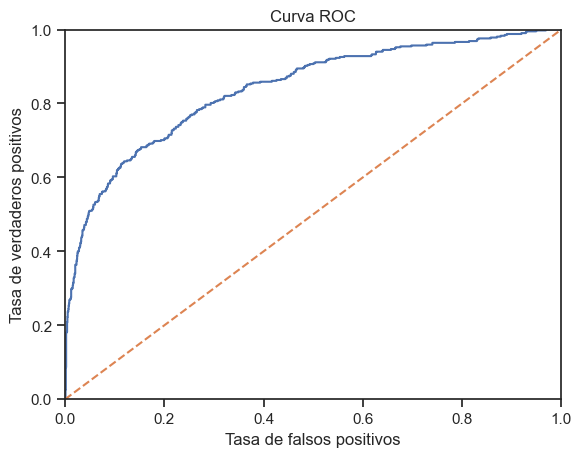

In [70]:
# se traza la gráfica 
probabilities_test = final_model_forest_up.predict_proba(features_test)
probabilities_one_test = probabilities_test[:, 1]

fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test)  



plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('Tasa de falsos positivos')
plt.ylabel('Tasa de verdaderos positivos')
plt.title('Curva ROC')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.show()

In [71]:
# se calcula  valor auc-roc
probabilities_valid = final_model_forest_up.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]

auc_roc = roc_auc_score(target_valid,probabilities_valid[:, 1])

print('AUC-ROC:', auc_roc)

AUC-ROC: 0.8537224673235682


El modelo de bosque aleatorio con sobremuestreo demostró un excelente rendimiento en el conjunto de prueba. Obtener un F1 score de 0.61 y un AUC-ROC de 0.85 indica que el modelo es capaz de realizar predicciones precisas y distinguir de manera efectiva entre las respuestas positivas y negativas en el conjunto de datos desequilibrado.

El sobremuestreo de la clase minoritaria permitió al modelo capturar mejor las características y patrones de ambas clases, lo que resultó en un aumento significativo en el F1 score y el AUC-ROC en comparación con los modelos sin tratamiento de desequilibrio de clases.

# Conslusión

Se realizaron diversas etapas de análisis y modelado utilizando el conjunto de datos almacenado en el archivo /datasets/Churn.csv. El conjunto de datos consistió en 10,000 observaciones y 14 características, y se centró en el comportamiento de los clientes, con la característica objetivo siendo "Exited".

Durante el análisis inicial, se identificaron valores ausentes en la característica "tenure", que representaban el 9% de los datos totales. Sin embargo, al investigar más a fondo, se encontró que esta característica no mostraba correlación con la variable objetivo, por lo que se decidió eliminarla, junto con otras columnas como "row_number", "customer_id", "surname" y "estimated_salary", ya que no aportaban información relevante para la clasificación.

Para preparar los datos para los modelos, se aplicó la técnica de codificación one-hot (OHE) a las características categóricas "Geography" y "Gender", convirtiéndolas en características numéricas.

La división de los datos en conjuntos de entrenamiento, validación y prueba se realizó en una proporción de 3:1:1 respectivamente.

Durante el análisis de los datos, se encontró que las clases de la variable objetivo estaban desbalanceadas, con solo el 20% de los clientes que se habían ido del banco, mientras que el 80% permanecía. Se realizó una prueba inicial sin tener en cuenta este desequilibrio utilizando el modelo de Bosque Aleatorio, que resultó en un AUC-ROC del 84%. Esto indicaba un posible valor predictivo del modelo, con un F1 score de 0.56. Sin embargo, se observó que el modelo tenía un recall de 0.47 y una precisión de 0.71, lo que significaba que identificaba más respuestas positivas que respuestas negativas, mientras buscaba respuestas positivas.

Para abordar el desequilibrio de clases, se aplicaron dos métodos. En primer lugar, se utilizó la técnica de sobremuestreo debido a la mayor cantidad de etiquetas "0" en comparación con las etiquetas "1". Esto generó una función que aplicaba el sobremuestreo a los datos de entrenamiento, devolviendo las características y la variable objetivo ajustadas. En segundo lugar, se ajustó el peso de las clases utilizando el parámetro class_weight='balanced' en cada modelo.

Se realizaron bucles para encontrar los mejores valores de hiperparámetros para cada tipo de modelo: Árbol de Decisión, Bosque Aleatorio y Regresión Logística. Se evaluaron los valores de F1 y AUC-ROC para seleccionar el modelo más adecuado.

Finalmente, el modelo elegido para el conjunto de datos de prueba fue el Bosque Aleatorio con sobremuestreo, ya que fue efectivo para abordar el desequilibrio de clases y logró resultados sólidos en la clasificación de respuestas positivas y negativas. Su F1 score de 0.61 y AUC-ROC de 0.85 respaldan su utilidad y efectividad.
